# Assignment 3 - Tashlin Reddy
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# 1- Differentiate digit 2 from Digit 7
## 1.1- Two principal components
- Select only digit 2, and digit 7 from ziptrain data set. 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

## 1.2- Logistic regression
- Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components.  Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).
- Build the confusion matrix on ziptest and check how well the model works on the test data.

# 2 -Multiple principal components
- Project train data onto "m = 2, 3, ..." principal components.
- Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

# 3-Differentiate all digits 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
- Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain
- Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded



### 1- Differentiate Digit 2 from Digit 7
#### 1.1 - Two Principal components

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data from url
ztrain = np.loadtxt("https://raw.githubusercontent.com/vahidpartovinia/ycbs255/master/jupyter/data/ziptrain.csv")
ztest = np.loadtxt("https://raw.githubusercontent.com/vahidpartovinia/ycbs255/master/jupyter/data/ziptest.csv")

In [3]:
#get general idea of data
# 1st column contains digit label, next 256 coloumns contain pixel/image data

ztrain.shape

(7291, 257)

##### 1.1.1 Select only digit 2, and digit 7 from ziptrain data set.

In [4]:
z2 = ztrain[ztrain[:,0]==2]
z7 = ztrain[ztrain[:,0]==7]

In [5]:
# stack both arrays to create 1 for analysis
z27 = np.vstack([z2, z7])

##### 1.1.2 Project zip train onto 2 principal components

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components =2 )

In [8]:
pca.fit(z27[:,1:])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

##### 1.1.3 Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

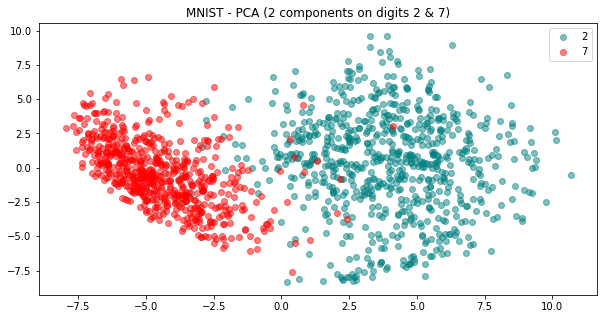

In [9]:
X_train = pca.transform(z27[:,1:])
plt.figure(figsize=(10,5))
twos = plt.scatter(X_train[z27[:,0]==2,0], X_train[z27[:,0]==2,1], c= 'teal', alpha = 0.5, label = '2')
sevens = plt.scatter(X_train[z27[:,0]==7,0], X_train[z27[:,0]==7,1], c= 'red', alpha = 0.5, label= '7')
plt.legend(handles = [twos,sevens])
plt.title("MNIST - PCA (2 components on digits 2 & 7)");

Seems like 2 components seperates digits 2 and 7 very well at first glance.


#### 1.2- Logistic regression

In [10]:
z27[10:,0]

array([2., 2., 2., ..., 7., 7., 7.])

In [11]:
y_train = z27

In [12]:
#convert 2's to 0 and 7's to 1 for logistic regression
y_train[y_train == 2] = 0
y_train[y_train == 7] = 1

In [13]:
#double check to make sure
y_train[10:,0]

array([0., 0., 0., ..., 1., 1., 1.])

In [14]:
# for y data only the labels are needed
y_train = y_train[:,0]
y_train.shape

(1376,)

##### 1.2.1 Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components. Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
#initialize log reg
lr = LogisticRegression()

In [17]:
print(X_train.shape)
print(y_train)

(1376, 2)
[0. 0. 0. ... 1. 1. 1.]


In [18]:
# fit model
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# get test data for 2's and 7's
z_logtest = np.vstack([ztest[ztest[:,0]==2], ztest[ztest[:,0]==7]])

In [20]:
# convert test data to two components
pca_test = PCA(n_components= 2)

In [21]:
pca_test.fit(z_logtest[:,1:])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
# fit and transform test data, excluding the labels
X_test = pca_test.fit_transform(z_logtest[:,1:])

In [23]:
X_test.reshape(-1,2)[:10]

array([[ 4.50521404, -2.07098109],
       [ 2.39924438, -3.8570604 ],
       [ 6.21551353, -4.26371048],
       [ 6.19692187, -8.38998228],
       [ 1.10698703, -3.64123218],
       [ 2.85319621, -2.51895702],
       [ 3.85306819, -1.52082617],
       [ 7.61166713, -1.60352402],
       [-0.10629816,  1.1480396 ],
       [ 3.0543291 , -0.20206168]])

In [24]:
#convert label test data to 0's and 1's for prediction
y_test = z_logtest[:,0]
y_test[y_test==2]=0
y_test[y_test==7]=1

##### 1.2.2 Build the confusion matrix on ziptest and check how well the model works on the test data.


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = lr.predict(X_test.reshape(-1,2))
print("confusion matrix \n",confusion_matrix(y_test, y_pred))
print("accuracy score:", accuracy_score(y_test, y_pred))

confusion matrix 
 [[187  11]
 [ 14 133]]
accuracy score: 0.927536231884058


In total we have 25 (11+14) incorrect predictions. 

### 2 -Multiple principal components

#### 2.1 Project train data onto "m = 2, 3, ..." principal components.

In [26]:
iter_ = 15
list1 = list(range(iter_))
for m in range(2,iter_+2):
    pca_train = PCA(n_components = m)
    pca_test = PCA(n_components = m)
    X_train = pca_train.fit_transform(z27[:,1:])
    X_test = pca_test.fit_transform(z_logtest[:,1:])
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test.reshape(-1,m))
    acc_score = accuracy_score(y_test, y_pred)
    list1[m-2] = acc_score

##### 2.2 Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

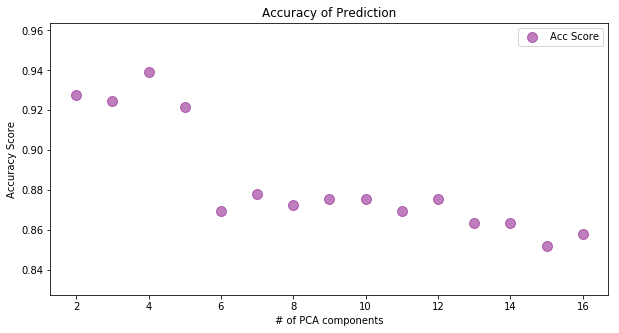

In [27]:
# Plot "m" vs incorrect predictions to get an idea of best "m"
components = list(range(2,iter_+2))
plt.figure(figsize=(10,5))
plt.scatter(components, list1, label = 'Acc Score', c = 'purple' , s= 100,  alpha = 0.5)

plt.legend()
plt.title("Accuracy of Prediction")
plt.xlabel("# of PCA components")
plt.ylabel("Accuracy Score")
plt.show()

Here we projected train data onto 2 to 16 principal components. There was little need to project more components as a trend was established.

We want to minimize the amount of INCORRECT predictions, so from our analysis, 4 principal components seems to be the best for prediction.

### 3-Differentiate all digits
##### 3.1 Project ziprain onto two principal components

In [28]:
pca_all = PCA(n_components=2)
Xall_train = pca_all.fit_transform(ztrain[:,1:])

##### 3.2 Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.

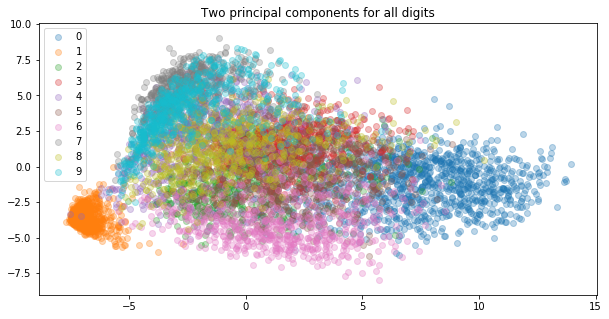

In [29]:
plt.figure(figsize = (10,5))
for i in range(10):
    plt.scatter(Xall_train[ztrain[:,0]==i,0],Xall_train[ztrain[:,0]==i,1], alpha= 0.3, label = str(i))
plt.legend()
plt.title('Two principal components for all digits')
plt.show()

Does not look too promising, lets check digits closely related.

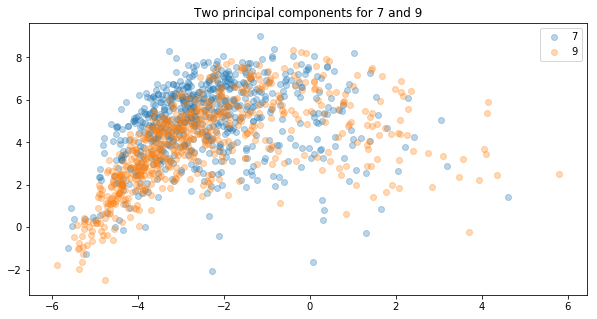

In [30]:
plt.figure(figsize = (10,5))
for i in [7,9]:
    plt.scatter(Xall_train[ztrain[:,0]==i,0],Xall_train[ztrain[:,0]==i,1], alpha= 0.3, label = str(i))
plt.legend()
plt.title('Two principal components for 7 and 9')
plt.show()

With 2 Principal components, we can see that digits 7 and 9 would be very hard to seperate

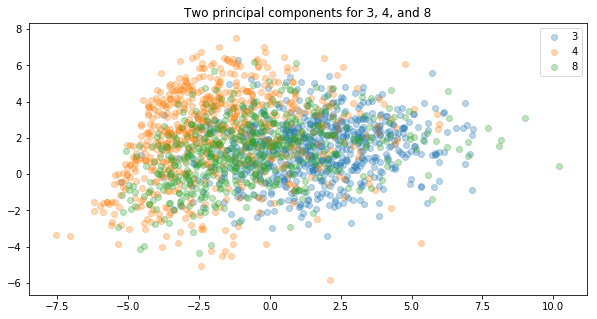

In [31]:
plt.figure(figsize = (10,5))
for i in [3,4,8]:
    plt.scatter(Xall_train[ztrain[:,0]==i,0],Xall_train[ztrain[:,0]==i,1], alpha= 0.3, label = str(i))
plt.legend()
plt.title('Two principal components for 3, 4, and 8')
plt.show()

Again, with 2 Principal components digits 3,4,8 would not be seperated well. 


##### From the above plots, it's safe to conclude that with only 2 components, all Digits are NOT seperated well. 


##### 3.3 Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [33]:
lda.fit(ztrain[:,1:], ztrain[:,0])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [34]:
y_lda_pred = lda.predict(ztest[:,1:])

In [35]:
y_lda_test = ztest[:,0]

In [36]:
a = confusion_matrix(y_lda_test,y_lda_pred)
print(a)

[[342   0   0   4   3   1   5   0   3   1]
 [  0 251   0   2   5   0   3   0   1   2]
 [  7   2 157   4  12   2   1   1  12   0]
 [  3   0   3 142   3   9   0   1   4   1]
 [  1   4   6   0 174   0   2   2   1  10]
 [  6   0   0  16   3 125   0   0   5   5]
 [  1   0   3   0   3   3 157   0   3   0]
 [  0   1   0   2   7   0   0 129   1   7]
 [  5   0   2  11   7   4   0   0 135   2]
 [  0   0   0   0   4   0   0   5   3 165]]


In [37]:
acc_score_all = accuracy_score(y_lda_test, y_lda_pred)
print(acc_score_all)

0.885401096163428


#### 3.4 Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).

In [38]:
iter_lda = 30 #number of iterations

list_score = list(range(iter_lda)) #initialize list to save accuracy score of each loop


y_lda_train = ztrain[:,0]
y_lda_test = ztest[:,0]

for m in range(2,iter_lda+2):
    pca_train = PCA(n_components = m)
    pca_test = PCA(n_components = m)
    
    X_train = pca_train.fit_transform(ztrain[:,1:])
    X_test = pca_test.fit_transform(ztest[:,1:])
    
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,y_lda_train)
    
    y_lda_pred = lda.predict(X_test.reshape(-1,m))

    acc_scor = accuracy_score(y_lda_test,y_lda_pred)
    list_score[m-2] =  acc_scor


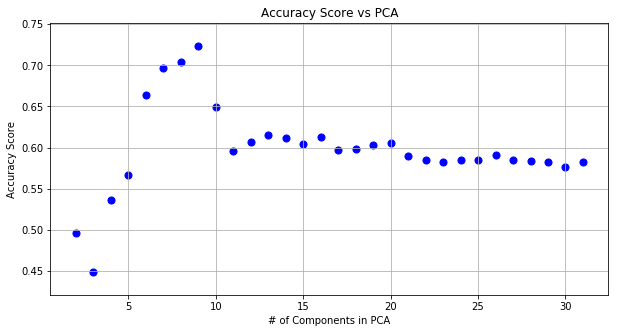

In [39]:
components_lda = list(range(2,iter_lda+2)) #number of principal components used in LDA
plt.figure(figsize = (10,5))
plt.scatter(components_lda,list_score , s = 50, c = 'blue')
plt.title('Accuracy Score vs PCA')
plt.xlabel('# of Components in PCA')
plt.ylabel('Accuracy Score')
plt.rc('grid', linestyle="--", color='black')
plt.grid(True)
plt.show()

We want to maximize Accuracy Score. From our plot it seems like 9 principal components maximizes our prediction. 

In [40]:
print("LDA without PCA accuracy score :", acc_score_all)
print("LDA With PCA accuracy score :", max(list_score), "with",list_score.index(max(list_score))+2, "components" )


LDA without PCA accuracy score : 0.885401096163428
LDA With PCA accuracy score : 0.7234678624813154 with 9 components


In conclusion it seems that PCA might be useful when the data is of a much higher dimension, 256 columns seems to be within the range that dimension reduction is mainly useful for visualization rather than prediction. Especially for this dataset. 
Without PCA and only LDA we get an accuracy score of 0.885, meaning 88.5% of predictions were correct. Where as our best accuracy score with LDA+PCA was a mere 0.723. 

